# **LATAR BELAKANG**

Pemerintah Amerika Serikat membentuk TSA *(Transportation Security Administration)* pada tanggal 19 November 2001 sebagai tindakan untuk menanggapi serangan teroris pada 1 September 2001. **TSA dibentuk dengan memiliki misi untuk melindungi sistem transportasi negara untuk memastikan kebebasan dan keamanan pergerakan seluruh orang dan perdagangan.**

Pemeriksa TSA bertanggung jawab atas keamanan di 440 bandara di Amerika Serikat. Di bandara ini, pemeriksa TSA menyaring lebih dari dua juta penumpang. Mengingat banyaknya barang dan orang yang diperiksa, tidak dapat dihindari bahwa orang dapat terluka atau barang dapat rusak, hilang, atau dicuri. Barang hilang adalah masalah signifikan dengan barang yang diperiksa. Individu yang terluka atau yang barangnya rusak, hilang, atau dicuri dapat mengajukan klaim kerugian kepada TSA. Pemerintah Amerika Serikat melaporkan informasi tentang setiap klaim yang diajukan [di sini](https://www.dhs.gov/tsa-claims-data).

# **PERNYATAAN MASALAH**

TSA Claim berisi kumpulan data klaim yang dibuat oleh penumpang atau individu atas properti yang hilang, rusak atau dicuri selama perjalanan, dengan data tersebut pemerintah ingin mengetahui atau mengidentifikasi pola dalam data klaim untuk mencari faktor umum antara klaim yang dibuat, seperti jenis properti yang diklaim, lokasi klaim atau tanggal saat klaim dibuat. Informasi ini dapat berguna bagi TSA dalam ngeidentifikasi area yang perlu ditingkatkan prosesnya atau dilakukan tindakan lainnya untuk mengurangi jumlah klaim yang diajukan.

**Pertanyaan:**
1. Claim terbanyak terjadi di bandara dan maskapai penerbangan apa?
2. Bagaimana perkembangan frekuensi klaim yang terjadi sejak tahun 2002 - 2015?
3. Bagaimana hubungan klaim yang diterima terhadap lokasi dan jenis penyelesaiannya?
3. Bagaimana cara / rekomendasi untuk mengurangi frekuensi klaim yang diajukan?


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# **DATA**

Dataset ini berisi TSA Claim pada tahun 2002 sampai dengan akhir tahun 2015. Ada 13 elemen data yang dikumpulkan setiap tahun sehubungan dengan setiap klaim.

- Claim Number: kode klaim
- Date Received: tanggal diterimanya klaim
- Incident Date: tanggal terjadinya kejadian
- Airport Code: kode bandara
- Airport Name: nama bandara
- Airline Name: nama maskapai penerbangan
- Claim Type: tipe klaim {bus terminal, complaint, compliment, employee loss, motor vehicle, passenger property loss, passenger theft, personal injury, property damage, wrongful death, NaN}
- Claim Site: lokasi klaim {bus station, checked baggage, checkpoint, motor vehicle, other, NaN}
- Item: jenis atau kategori barang klaim 
- Claim Amount: nilai/harga kerugian barang yang di klaim
- Status: status klaim barang {approved, canceled, claim has been assigned for further
review, closed as contractor claim, denied, in litigation, in review, insufficient (missing critical
information), pending response from claimant, settled}
- Close Amount: nilai/harga yang diganti rugi (kerugian yang dibayarkan)
- Disposition: hasil/status akhir dari proses klaim

Berikut ini menampilkan 5 baris teratas dan terbawah dari dataset *tsa_claims*

In [2]:
df = pd.read_csv('tsa_claims.csv')
display(df.head())
display(df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


# **DATA UNDERSTANDING & DATA CLEANING**



In [3]:
print(f'Jumlah baris dan kolom pada dataset tsa_claims  adalah {df.shape}')

print(f'Informasi kolom dataset tsa_claims')
display(df.info())

Jumlah baris dan kolom pada dataset tsa_claims  adalah (204267, 13)
Informasi kolom dataset tsa_claims
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


None

In [4]:
df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [5]:
list = []

for item in df:
    list.append([item, df[item].unique(), df[item].nunique()])

unique_table = pd.DataFrame(columns=['Column', 'Unique', 'Nunique'], data=list)

display(unique_table)

,Column,Unique,Nunique
0,Claim Number,"[0909802M, 0202417M, 0202445M, 0909816M, 20050...",204258
1,Date Received,"[4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe...",4007
2,Incident Date,"[12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0...",26807
3,Airport Code,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ...",465
4,Airport Name,"[Newark International Airport, Seattle-Tacoma ...",485
5,Airline Name,"[Continental Airlines, nan, American Airlines,...",318
6,Claim Type,"[Property Damage, Passenger Property Loss, nan...",11
7,Claim Site,"[Checkpoint, Checked Baggage, Other, Motor Veh...",6
8,Item,"[Other, Luggage (all types including footlocke...",4704
9,Claim Amount,"[$350.00 , $100.00 , $278.88 , $50.00 , $84.79...",36117


In [6]:
df.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

- tsa_claims dataset terdiri dari 13 kolom dan 204267 baris data;
- Terdapat 13 kolom ternyata hampir semua kolom memiliki data kosong, kecuali satu kolom yaitu kolom `claim number`. Data kosong pada kolom-kolom itu di isi dengan data NaN;
- Kolom `Claim Number` berisikan nomor unik yang memiliki format berbeda-beda setiap penumpangnya sehingga sebenarnya kolom ini bisa dihapus saja;
- Kolom `Date Received` dan `Incident Date` memiliki data tipe object yang seharusnya kolom ini memiliki tipe data datetime;
- Kolom `Incident Date` memiliki format tanggal yang berbeda-beda, format tanggal pada tahun 2002-2013 adalah dd/mm/yyyy(11/3/2013), kemudian format tanggal pada tahun 2014-2015 adalah dd-month-yy (30-Jun-14)
- Kolom `Claim Amount` dan `Close Amount` memiliki data tipe object, karena data pada kolom ini merupakan harga maka seharusnya berisikan data numerik, hal ini perlu dilakukan pemeriksaan lebih detail.

## **MISSING VALUE**

In [7]:
print(f'Persentase missing value pada setiap kolom')

df.isnull().sum()/df.shape[0]*100

Persentase missing value pada setiap kolom


Claim Number      0.000000
Date Received     0.128753
Incident Date     1.068699
Airport Code      4.172970
Airport Name      4.172970
Airline Name     16.827975
Claim Type        3.873851
Claim Site        0.362271
Item              1.941576
Claim Amount      1.979272
Status            0.002448
Close Amount     33.755820
Disposition      35.692501
dtype: float64

Melihat sebaran missing value pada tsa_claims dataset

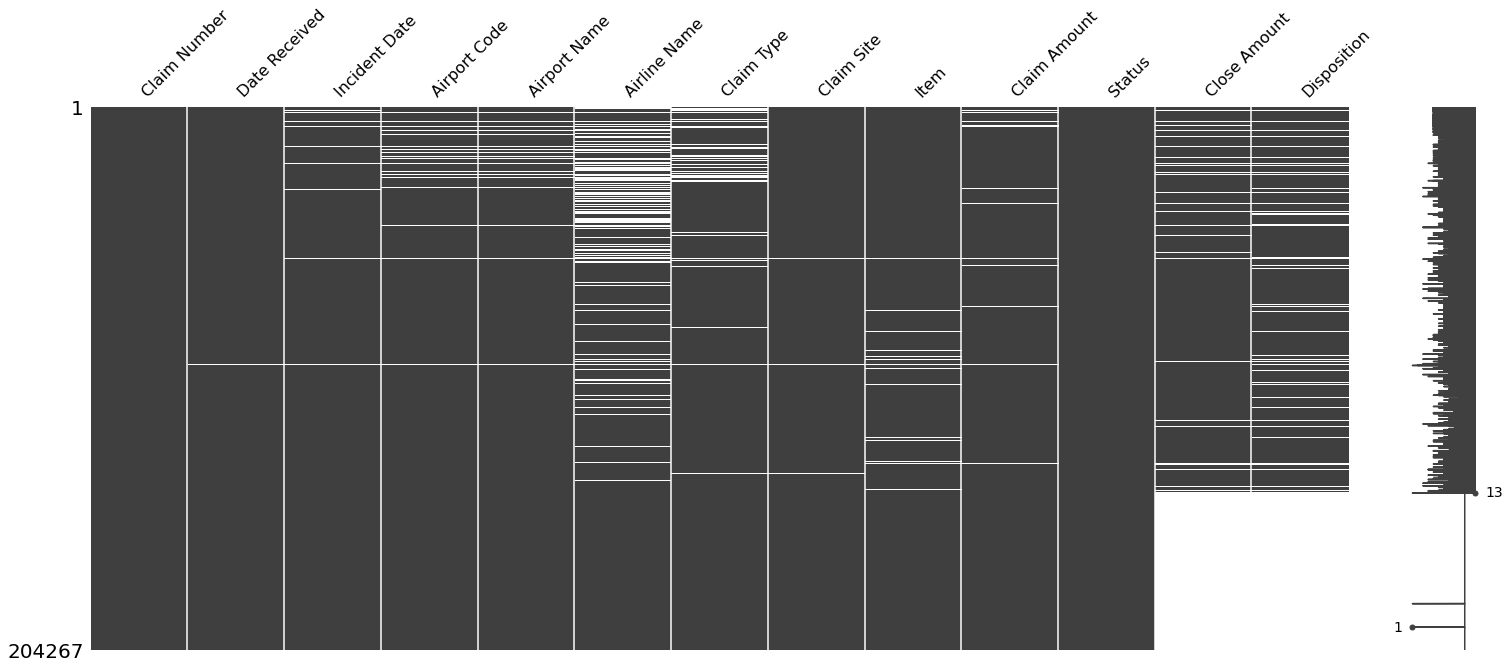

In [8]:
import missingno

missingno.matrix(df);

- Terdapat 3 kolom yang memiliki proporsi missing value yang cukup tinggi (lebih dari 10%) yaitu `Airline Name`, `Close Amount`, dan `Deposition`;
- Missing value pada kolom `Airport Code` dan `Airport Name` memiliki keterkaitan karena apabila data pada kolom `Airport Code` kosong maka data di `Airport Name` juga pasti kosong;
- Missing value pada `Close Amount` dan `Deposition` memiliki persentase sampai dengan 33.76% dan 35.69%, berdasarkan heatmap yang terdapat diatas juga bahwa sebaran data `Close Amount` dan `Deposition` berkemungkinan besar saling berkaitan.

#### `Date Recevied` dan `Incident Date`

Dikarenakan format tanggal kolom `Incident Date` pada tahun 2002-2013 dan 2014-2015 berbeda maka dataset akan dibagi menjadi dua dataframe agar proses mengubah data type lebih mudah.

In [9]:
df1 = df.iloc[:186742]
df1

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186737,2014010710602,31-Dec-13,12/13/2013 0:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Property Damage,Checked Baggage,Clothing,-,-,NaN,NaN
186738,2014010710603,31-Dec-13,12/29/2013 0:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Cameras; Other; Other,-,-,NaN,NaN
186739,2014010810606,31-Dec-13,12/22/2013 11:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Other,-,-,NaN,NaN
186740,2014010810614,31-Dec-13,12/16/2013 18:00,CID,Eastern Iowa,Allegiant Air,Property Damage,Checkpoint,Personal Electronics,-,-,NaN,NaN


In [10]:
# Mengubah kolom 'Date Received' df1 menjadi datetime
df1['Date Received'] = pd.to_datetime(df1['Date Received'], format= '%d-%b-%y')

In [11]:
# Mengubah kolom 'Incident Date' df1 menjadi datetime, error disini berfungsi untuk mengisi data yang memiliki format tanggal yang berbeda menjadi 'NaT'
df1['Incident Date'] = pd.to_datetime(df1['Incident Date'], errors = 'coerce')

In [12]:
# Mengubah format tanggal kolom 'Incident Date' df1 agar sama dengan 'Date Received', dtype akan kembali menjadi object
df1['Incident Date'] = df1['Incident Date'].dt.strftime('%Y-%m-%d')

In [13]:
# Mengubah dtype setelah format tanggal sama menjadi datetime
df1['Incident Date'] = pd.to_datetime(df1['Incident Date'])

In [14]:
df2 = df.iloc[186744:]
df2

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
186744,2013081805991,13-Jan-14,21-Dec-12,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,$0.00,Deny,NaN,NaN
186745,2014080215586,17-Jul-14,30-Jun-14,MCO,Orlando International Airport,Delta Air Lines,Property Damage,Checked Baggage,-,$0.00,Deny,NaN,NaN
186746,2014010710583,7-Jan-14,27-Dec-13,SJU,Luis Munoz Marin International,Jet Blue,Property Damage,Checked Baggage,Food & Drink,$50.00,Approve in Full,NaN,NaN
186747,2014010910683,7-Jan-14,2-Jan-14,IAD,Washington Dulles International,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN
186748,2014011310783,9-Jan-14,7-Jan-14,SAT,San Antonio International,Southwest Airlines,Property Damage,Checked Baggage,Computer & Accessories,$0.00,Deny,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [15]:
# Mengubah kolom 'Date Received' df2 menjadi datetime
df2['Date Received'] = pd.to_datetime(df2['Date Received'], format= '%d-%b-%y')

In [16]:
# Mengubah kolom 'Incident Date' df1 menjadi datetime
df2['Incident Date'] = pd.to_datetime(df2['Incident Date'])

In [17]:
df = pd.concat([df1, df2], axis=0)

Dari proses diatas dapat dilihat bahwa Dtype pada kolom `Date Recevied` dan `Incident Date` sudah berubah dari yang pada awalnya *object* menjadi *datetime*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204265 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204265 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  201920 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 21.8+ MB


In [19]:
df[df['Date Received'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
96973,2007040223375,NaT,2007-03-28,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other; Professional Equipment,$5;000.00,Denied,$0.00,Deny
96974,2007071028012,NaT,2007-06-26,OAK,Metropolitan Oakland International,Jet Blue,Passenger Property Loss,Checkpoint,Other,$300.00,Denied,$0.00,Deny
96975,2007090431288,NaT,2007-08-23,DFW,Dallas-Fort Worth International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,$131.09,Settled,$65.55,Settle
96976,2007110534445,NaT,2007-10-22,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,$96.00,Denied,$0.00,Deny
96977,2007120435958,NaT,2007-11-29,BDL,Bradley International Airport,UAL,Passenger Property Loss,Checked Baggage,MP3 Players-(iPods; etc),$291.40,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97229,2004070858901,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Settled,$25.00,Settle
97230,21525,NaT,2002-11-25,LGA,LaGuardia,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,$2;200.00,Settled,$1;197.00,Settle
97231,==> 2.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145144,==> 3.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melakukan drop baris `97231`, `145144`, `195599` karena nilai seluruh kolomnya kosong

In [20]:
df.drop([97231,145144,195599], axis=0, inplace=True)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [21]:
df[['Date Received', 'Incident Date']].isna().sum()

Date Received     258
Incident Date    2342
dtype: int64

Terdapat 258 data kosong pada kolom `Date Received` dan 2342 pada kolom `Incident Date`. 
- Data kosong (NaT) pada kolom `Date Received` akan diisi dengan data tanggal baris sebelumnya yang terdekat, karena apabila dilihat dari datanya kolom `Date Received` berisi tanggal pelaporan klaim yang dibuat secara berurutan dimulai dari Januari 2002 sampai dengan Desember 2015. 
- Data kosong (NaT) pada kolom `Incident Date` akan diisi dengan data yang sama dengan data kolom `Date Received` pada baris yang sama, hal ini dilakukan dengan asumsi bahwa laporan klaim dibuat di tanggal yang sama dengan tanggal insiden.

In [22]:
# Mengisi data kosong pada kolom 'Date Received' dengan data sebelumnya
df['Date Received'].fillna(method='pad', inplace=True)

In [23]:
# Mengisi data kosong pada kolom 'Incident Date' dengan nilai yang sesuai dari kolom 'Date Received'
df['Incident Date'].fillna(df['Date Received'], inplace=True)

Setelah mengisi nilai missing value, ditemukan beberapa anomali data:
- Dataset tsa_claims ini berisikan data tahun 2002 - 2015 namun pada kolom `Date Received` dan `Incident Date` terdapat data yang kurang dari tahun 2002, kemudian pada kolom `Date Received` juga terdapat data yang lebih dari tahun 2015, hal ini mungkin dapat terjadi karena terjadi kesalahan saat proses input data.
- Beberapa data pada `Incident date` terjadi setelah `Date Received`, dimana hal ini tidak mungkin terjadi karena `Date Received` merupakan tanggal pembuatan klaim, dan klaim hanya bisa dibuat apabila terjadi insiden.

In [24]:
# Menunjukan data yang tahunnya tidak sesuai
display(df['Date Received'].dt.year.sort_values(ascending=False))
display(df['Incident Date'].dt.year.sort_values(ascending=False))

96944    2055
96943    2044
96942    2040
96937    2025
96938    2025
         ... 
96962    2000
96963    2000
96964    2000
96966    1996
96945    1994
Name: Date Received, Length: 204262, dtype: int64

204266    2015
198644    2015
198616    2015
198627    2015
198628    2015
          ... 
44757     2000
75637     2000
29229     2000
42989     2000
33931     1996
Name: Incident Date, Length: 204262, dtype: int64

Setelah diperiksa lebih detail, ternyata data tahun yang tidak sesuai memiliki pola yang tidak tentu maka dari itu untuk mengatasi anomali ini diputuskan untuk menghapus data yang memiliki anomali tersebut.

In [25]:
df.iloc[96930:96947]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
96930,2007010318227,2006-12-29,2006-12-13,DTW,Detroit Metropolitan Wayne County Airport,NaN,Passenger Property Loss,Checked Baggage,Books - Other (Hardcover non-fiction); Other,$328.00,Settled,$79.00,Settle
96931,2007010318231,2006-12-29,2006-12-26,HNL,Honolulu International Airport,ATA Aerocondor,Passenger Property Loss,Checked Baggage,Cameras - Digital,$250.00,Settled,$87.58,Settle
96932,2007010418280,2006-12-29,2006-12-13,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$507.00,Settled,$143.80,Settle
96933,2007010418284,2006-12-29,2006-12-26,LGA,LaGuardia,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Costume; Luggage (all types includin...,$300.00,Settled,$241.47,Settle
96934,2007010418288,2006-12-29,2006-12-22,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop,$1;249.64,Settled,$362.20,Settle
96935,2007010418295,2006-12-29,2006-12-09,ABE,Lehigh Valley International Airport; Allentown,UAL,Property Damage,Checked Baggage,Video Recordings (blank & commercial),$350.00,Settled,$289.00,Settle
96936,2006051105953,2020-05-08,2006-04-04,JFK,John F. Kennedy International,NaN,Property Damage,Checked Baggage,Clocks - Inexpensive ($75.00 or less); Clothin...,$637.76,Settled,$179.08,Settle
96937,2005051985068,2025-05-17,2005-04-18,MCO,Orlando International Airport,AirTran Airlines,Property Damage,Checked Baggage,Musical Instruments - Other - Over $250,$100.00,Approved,$100.00,Approve in Full
96938,2005060785897,2025-05-31,2005-05-06,OAK,Metropolitan Oakland International,Southwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$65.00,Denied,$0.00,Deny
96939,2005090792253,2025-05-31,2005-07-26,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,Locks,$250.00,Denied,$0.00,Deny


In [26]:
# Menampilkan data tahun 2002-2015 saja
df = df[(df['Date Received'].dt.year.isin(range(2002,2015+1))) & (df['Incident Date'].dt.year.isin(range(2002,2015+1)))]

In [27]:
# Menunjukan data yang `Incident Date` terjadi setelah klaim diterima
df[(df['Incident Date'] > df['Date Received'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160944,2011061784423,2011-06-08,2011-06-17,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Property Damage,Motor Vehicle,-,-,-,NaN,NaN
161027,2011062284549,2011-06-10,2011-06-22,SAN,San Diego International,American Airlines,Passenger Property Loss,Checked Baggage,Medical/Science,-,-,NaN,NaN
161035,2011062384567,2011-06-10,2011-06-23,PHF,Newport News / Williamsburg International,-,Property Damage,Checked Baggage,Clothing,-,-,NaN,NaN
161154,2011070184895,2011-06-14,2011-07-01,-,-,-,Property Damage,Checkpoint,Clothing,-,-,NaN,NaN


In [28]:
# Persentase anomali data
df[(df['Incident Date'] > df['Date Received'])].shape[0]/df.shape[0]*100

0.8187369317931416

In [29]:
df['Status'][(df['Incident Date'] > df['Date Received'])].value_counts()

Denied                                                                                                                           704
Approved                                                                                                                         330
Settled                                                                                                                          282
Canceled                                                                                                                          84
Deny                                                                                                                              70
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     66
-                                                                                                                                 58
Approve in Full                                                      

Terdapat 1672 data atau hanya 0.82% dari keseluruhan data yang memiliki anomali tanggal pada kolom `Incident Date` terjadi setelah dibuatnya klaim. Apabila dilakukan pemeriksaan lebih detail hubungan kekeliruan data `Incident Date` dengan kolom `Status`, bahwa kekeliruan data tanggal `Incident Date` ini hampir separuhnya menyebabkan `Status` klaim ditolak. Dikarenakan anomali ini terjadi karena kemungkinan besar kesalahan saat proses input dan tidak ditemukan metode yang cocok untuk menangani anomali ini, maka dari itu untuk menanganinya maka akan dilakukan penghapusan terhadap 1672 data ini.

In [30]:
# Drop 1672 data anomali
date_anomali = df[(df['Incident Date'] > df['Date Received'])].index
df.drop(date_anomali, inplace=True)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [31]:
# Reset index setelah melakukan drop anomali
df.reset_index(drop=True, inplace=True)

#### `Airport Code` dan `Airport Name`

Berdasarkan analisis sebelumnya, bisa diketahui bahwa missing value dari `Airport Code` dan `Airport Name` saling berkaitan. Maka untik mengatasi missing value kedua kolom ini akan dilakukan secara bersamaan.

In [32]:
# Pemeriksaan Airport Name sesuai dengan Airport Code
check = df.groupby('Airport Code') ['Airport Name'].nunique().sort_values(ascending=False)
df[df['Airport Code'].isin(check[check>1].index)].groupby('Airport Code') ['Airport Name'].unique()

Airport Code
BOS    [Boston (Logan) International Airport, Boston ...
BUR                                [Bob Hope, Bob Hope ]
BZN    [Gallatin Field, Bozeman Yellowstone Internati...
DEN    [Denver International Airport, Denver Internat...
DFW    [Dallas-Fort Worth International Airport, Dall...
DUJ    [Dubois Jefferson County, Dubois Jefferson Cou...
EAR    [Kearney Municipal Airport, Kearney Municipal ...
HIB    [Chisolm-Hibbing Municipal, Chisolm-Hibbing Mu...
INL          [Falls International, Falls International ]
JHM                  [Kapalua Airport, Kapalua Airport ]
LAX    [Los Angeles International Airport, Los Angele...
LGA                              [LaGuardia, LaGuardia ]
MCW    [Mason City Municipal Airport, Mason City Muni...
MKK                  [Molokai Airport, Molokai Airport ]
MMH                      [Mammoth Lakes , Mammoth Lakes]
OAJ    [Albert J Ellis; Jacksonville,  Albert J Ellis...
PGV    [Pitt-Greenville Airport, Pitt-Greenville Airp...
PNS    [Pensacola 

Apabila dilihat lebih detail tenyata dalam satu `Airport Code` memiliki beberapa `Airport Name` yang dimana hal ini merupakan hal yang jarang terjadi. Namun hal ini dapat terjadi karena banyak data pada kolom `Airport Name` yang memiliki kelebihan spasi hingga dideteksi sebagai nama yang berbeda.

In [33]:
# Menghapus kelebihan spasi ataupun karakter yang tidak diperlukan pada data kolom `Airport Name` dan `Airport Code`

df['Airport Name'] = df['Airport Name'].str.strip()

df['Airport Code'] = df['Airport Code'].str.strip()

In [34]:
# Dilakukan lagi pemeriksaan lagi terhadap kolom Airport Name sesuai dengan Airport Code nya
check = df.groupby('Airport Code') ['Airport Name'].nunique().sort_values(ascending=False)
df[df['Airport Code'].isin(check[check>1].index)].groupby('Airport Code') ['Airport Name'].unique()

Airport Code
BZN    [Gallatin Field, Bozeman Yellowstone Internati...
PNS    [Pensacola Regional, Pensacola International A...
Name: Airport Name, dtype: object

Setelah dilakukan penghapusan terhadap spasi yang berlebih maka dapat dilihat data untuk kolom `Airport Code` dan `Airport Name` sudah lebih teratur dari sebelumnya yang memiliki banyak sekali *distict value*. Selanjutnya karena missing value dari kolom `Airport Code` dan `Airport Name` belum diisi, maka karena data pada kedua kolom merupakan data kategorik maka akan missing value akan diisi sebagai *Not Defined*.

In [35]:
# Mengisi data kosong kolom Airport Name dan Airport Code
df[['Airport Name', 'Airport Code']] = df[['Airport Name', 'Airport Code']].fillna(value='Not Defined')

In [36]:
df[['Airport Name', 'Airport Code']] = df[['Airport Name', 'Airport Code']].fillna(value='Not Defined')

#### `Airline Name`

Data pada kolom `Airline Name` ini cukup berantakan karena tidak konsisten, maka dari itu data nama airline yang tidak konsisten ini bisa dilakukan penghapusan terhadap spasi berlebih dan mengganti beberapa penamaan airlines yang tidak konsisten.

In [37]:
# Memeriksa nilai unik pada kolom airline name
df['Airline Name'].value_counts()

American Airlines            17373
Delta Air Lines              17071
UAL                          13870
Southwest Airlines           13068
Continental Airlines          9571
                             ...  
Czech Airlines                   1
Air Ukraine International        1
Comair Inc                       1
Air Atlantic Ltd                 1
Air Aruba                        1
Name: Airline Name, Length: 318, dtype: int64

In [38]:
# Menghapus space berlebih
df['Airline Name'] = df['Airline Name'].str.strip()

In [39]:
# Memeriksa nilai unik pada kolom airline name (nilai unik berkurang setelah space berlebih dihapus dari 318 menjadi 233)
df['Airline Name'].value_counts()

Delta Air Lines        25417
American Airlines      23670
Southwest Airlines     20427
UAL                    19736
USAir                  13297
                       ...  
Vieques Air                1
Globe Span Airlines        1
Air Nippon                 1
Maxair                     1
Air Aruba                  1
Name: Airline Name, Length: 233, dtype: int64

In [40]:
# Memeriksa nilai unik kolom Airlines Name
df['Airline Name'].unique()

array(['Southwest Airlines', nan, 'American Airlines',
       'Northwest Airlines', 'Delta Air Lines', 'America West',
       'Continental Airlines', 'USAir', 'UAL', 'Virgin Atlantic',
       'Jet Blue', 'Alaska Airlines', 'Aloha Airlines',
       'AirTran Airlines', 'Spirit Airlines', 'Frontier Airlines',
       'American West', 'Air Canada', 'British Airways',
       'America Trans Air', 'Aero Mexico', 'Hawaiian Airlines',
       'Lufthansa', 'Horizon Air', 'Lan Airlines',
       'Midwest Express Airlines', 'Qantus Airways',
       'Frontier Aviation Inc', 'Korean Airlines', 'Air Jamaica',
       'KLM Royal Dutch Airlines', 'Alitalia', 'Air France', 'Aer Lingus',
       'Air Tran Airlines(do not use)', 'Austrian Airlines',
       'Japan Airlines', 'Sun Country Airlines Inc', 'Comair Inc',
       'Delta (Song)', 'ATA Aerocondor', 'Singapore Airlines', 'Mexicana',
       'Swiss Air', 'Aero Flot', 'Air 2000 Ltd Great Britain',
       'Skywest Airlines Inc USA', 'Allegiant Air', 'TWA',
 

In [41]:
# Mengganti beberapa nama airlines yang tidak konsisten
df['Airline Name'].replace('AirTranAirlines(donotuse)', 'AirTranAirlines', inplace=True)
df['Airline Name'].replace('AmericaWest', 'AmericanWest', inplace=True)
df['Airline Name'].replace('Delta(Song)', 'DeltaAirLines', inplace=True)
df['Airline Name'].replace('AeroFlot', 'AeroflotRussianInternational', inplace=True)
df['Airline Name'].replace('FrontierAviationInc','FrontierAirlines',inplace=True)
df['Airline Name'].replace('NorthwestInternationalAirwaysLtd','NorthwestAirlines',inplace=True)


Setelah dilakukan perbaikan terhadap data yang tidak konsisten selanjutnya dilakukan pengisian missing value dengan *Not Defined*.

In [42]:
# Mengisi data kosong kolom Airlines Name
df[['Airline Name']] = df[['Airline Name']].fillna(value='Not Defined')

In [43]:
# Mengubah nilai '-' menjadi 'Not Defined' pada kolom Airport Name, Airport Code dan Airline Name
df['Airport Name'].replace('-', 'Not Defined', inplace=True)
df['Airport Code'].replace('-', 'Not Defined', inplace=True)
df['Airline Name'].replace('-', 'Not Defined', inplace=True)

#### `Claim Type` dan `Claim Site`

Mengisi nilai kosong pada kolom `Claim Type` dan `Claim Site` dengan *Other* karena data berbentuk kategorik.

In [44]:
# Menghitung nilai unik dalam setiap kolom
display(df['Claim Type'].value_counts())
display(df['Claim Site'].value_counts())

Passenger Property Loss    116943
Property Damage             74692
Personal Injury              1461
Employee Loss (MPCECA)        477
Passenger Theft               452
Motor Vehicle                 368
-                             274
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

Checked Baggage    158438
Checkpoint          39790
Other                2858
Motor Vehicle         472
-                     266
Bus Station            16
Name: Claim Site, dtype: int64

In [45]:
# Mengisi data kosong kolom 'Claim Type' dan 'Claim Site'
df[['Claim Type']] = df[['Claim Type']].fillna(value='Other')
df[['Claim Site']] = df[['Claim Site']].fillna(value='Other')

In [201]:
df['Claim Site'].replace('-', 'Not Defined', inplace=True)

#### `Item`

Kolom `Item` memiliki nilai unik berbentuk kategorik sebanyak 4688, maka untuk mengisi nilai kosong pada kolom ini diisi dengan *Other*

In [46]:
# Menampilkan jumlah dan nilai unik pada kolom 'Item'
df['Item'].value_counts()

Other                                                                                                                              36525
Luggage (all types including footlockers)                                                                                          18911
Clothing - Shoes; belts; accessories; etc.                                                                                         14774
Jewelry - Fine                                                                                                                      9799
Locks                                                                                                                               9491
                                                                                                                                   ...  
Cards - Greeting; Jewelry - Fine                                                                                                       1
Books - Reference books; cookbooks; etc.;

In [47]:
# Mengisi nilai kosong pada kolom Item
df[['Item']] = df[['Item']].fillna(value='Other')

Kolom `Item` ini memiliki nilai unik kategorik yang rumit, karena kategori dipisahkan oleh berbagai tanda dan skema penamaannya sangat bervariasi. Maka dari itu kita perlu menyeragamkan format data kategorik pada kolom ini.

In [48]:
# Membersihkan format yang berbeda pada kolom 'Item'
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.split('-').map(lambda x:'' if type(x) == float else x[0])
df['Item'] = df['Item'].str.split(r'; ').map(lambda x: x[0])
df['Item'] = df['Item'].str.split(r' \(').map(lambda x: x[0])
df['Item'] = df['Item'].str.split(r' &').map(lambda x: x[0])


Setelah format pada kolom `Item` dibersihkan, jumlah nilai unik berubah dari 4688 menjadi 131.

In [49]:
df['Item'].value_counts()

Other                41069
Luggage              19172
Clothing             17324
Cameras              11984
Jewelry              11274
                     ...  
Electric Blankets        1
Furs                     1
Rugs                     1
Ladders                  1
Typewriters              1
Name: Item, Length: 131, dtype: int64

In [50]:
df['Item'].replace('', 'Other', inplace=True)

#### `Claim Amount`

Terdapat perbedaan format dan beberapa tanda yang tidak diperlukan pada data di kolom `Claim Amount` ini maka perlu dilakukan perubahan format dan mengubah tipe data menjadi float karena data pada kolom ini merupakan dalam bentuk angka.

In [51]:
# Mengubah format data
df['Claim Amount'] = df['Claim Amount'].str.replace('$','').str.replace('-','0').str.replace(';','')
df['Claim Amount'] = df['Claim Amount'].str.strip()

In [52]:
# Mengubah tipe data menjadi float
df['Claim Amount'] = df['Claim Amount'].astype(float)

Kolom `Claim Amount` ini berkaitan dengan kolom `Close Amount` dan `Status`. Saat status klaim ditolek maka data pada kolom `CLose Amount` juga akan menjadi nol. Namun, tidak ada cara pasti untuk menyimpulkan keterkaitan data kolom `Claim Amount` sehingga data kosong atau missing value pada kolom `Claim Amount` ini akan di drop saja.

In [53]:
df[df['Claim Amount'].isna()] [['Claim Amount', 'Close Amount', 'Status']]

,Claim Amount,Close Amount,Status
5,NaN,NaN,Denied
9,NaN,NaN,Insufficient; one of the following items requi...
11,NaN,NaN,Insufficient; one of the following items requi...
13,NaN,$0.00,Denied
18,NaN,$0.00,Canceled
...,...,...,...
143397,NaN,NaN,Insufficient; one of the following items requi...
143466,NaN,NaN,Insufficient; one of the following items requi...
143467,NaN,NaN,Insufficient; one of the following items requi...
143517,NaN,NaN,Insufficient; one of the following items requi...


In [54]:
# Drop baris yang mengandung missing value pada kolom 'Claim Amount'
df.dropna(subset=['Claim Amount'], inplace=True)

Selanjutnya apabila dilihat lebih detail data pada kolom `Claim Amount ` ini terdapat data yang berjumlah $0, sehingga data seperti ini merupakan termasuk dari anomali data yang perlu di drop.

In [55]:
df[df['Claim Amount']==0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
2560,0702509M,2003-02-13,2002-12-31,MCO,Orlando International Airport,UAL,Property Damage,Checked Baggage,Locks,0.0,Denied,$0.00,Deny
4689,0408103L,2003-04-08,2003-03-11,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Luggage,0.0,Canceled,$0.00,NaN
5737,0429003L,2003-04-29,2003-03-22,IAD,Washington Dulles International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,0.0,Canceled,NaN,NaN
5748,0429023L,2003-04-29,2003-03-24,FLL,Ft. Lauderdale-Hollywood International,Not Defined,Property Damage,Checked Baggage,Clothing,0.0,Insufficient; one of the following items requi...,NaN,NaN
6162,0507041L,2003-05-07,2003-03-25,DFW,Dallas-Fort Worth International Airport,American Airlines,Property Damage,Checked Baggage,Fish/Game,0.0,Insufficient; one of the following items requi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202540,2015120427297,2015-11-20,2015-10-16,Not Defined,Not Defined,Not Defined,Property Damage,Checked Baggage,Baggage/Cases/Purses,0.0,-,NaN,NaN
202541,2015123027969,2015-12-17,2015-12-02,Not Defined,Not Defined,Not Defined,Property Damage,Checked Baggage,Audio/Video,0.0,-,NaN,NaN
202542,2016010428072,2015-12-22,2015-12-20,Not Defined,Not Defined,Not Defined,Passenger Property Loss,Checked Baggage,Clothing,0.0,-,NaN,NaN
202543,2016011328300,2015-12-30,2015-12-28,Not Defined,Not Defined,Not Defined,Passenger Property Loss,Checked Baggage,Tools,0.0,-,NaN,NaN


In [56]:
# Menghapus anomali data kolom `Claim Amount` yang memiliki nilai $0
index_zero = df[df['Claim Amount']==0].index
df.drop(index_zero, inplace=True)

In [57]:
df.reset_index(drop=True, inplace=True)

#### `Status`

Pada kolom kali ini dikarenakan terdapat 14 nilai unik dan pada analisis kali ini hanya akan dipakai beberapa nilai unik saja yaitu Approved, Approve in Full, Deny, Denied, Settle, Settled

In [58]:
# Mengubah '-' pada kolom status menjadi 'Other'
df['Status'].replace('-', 'Other', inplace=True)

In [59]:
# Menghapus data yang memiliki status selain approve, deny dan settle
valid_status = ['Approved', 'Approved in Full', 'Denied', 'Deny', 'Settled', 'Settle']

df = df[df['Status'].isin(valid_status)]

In [60]:
# Mengubah penamaan data kategorik
df['Status'].replace('Approve in Full', 'Approved', inplace=True)
df['Status'].replace('Settle', 'Settled', inplace=True)
df['Status'].replace('Deny', 'Denied', inplace=True)

In [61]:
df.reset_index(drop=True, inplace=True)

#### `Close Amount`

In [62]:
# Mengubah format data
df['Close Amount'] = df['Close Amount'].str.replace('$','').str.replace('-','0').str.replace(';','')
df['Close Amount'] = df['Close Amount'].str.strip()

In [63]:
# Mengubah tipe data menjadi float
df['Close Amount'] = df['Close Amount'].astype(float)

In [64]:
df[df['Close Amount'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Not Defined,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,NaN,Deny
14,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,Not Defined,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny
17,18193,2002-09-16,2002-07-26,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Other,Currency,428.21,Denied,NaN,Deny
57,19078,2002-10-17,2002-09-12,SAT,San Antonio International,Southwest Airlines,Other,Other,Computer,30.00,Approved,NaN,Approve in Full
68,21051,2002-10-21,2002-10-03,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Other,Other,Cell Phones,75.00,Approved,NaN,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134884,2015032721574,2015-03-27,2015-03-12,YKM,Yakima Air Terminal-Mcallister,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Settled,NaN,NaN
134885,2015080424556,2015-07-30,2015-07-20,YNG,Youngstown-Warren Regional,Allegiant Air,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,3.00,Settled,NaN,NaN
134886,2014121619219,2015-03-17,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Not Defined,Personal Injury,Motor Vehicle,Other,4531.16,Settled,NaN,NaN
134887,2015032721575,2015-03-27,2014-09-09,ZZX,Non TSA Airport (motor vehicle),Not Defined,Motor Vehicle,Motor Vehicle,Other,2206.35,Settled,NaN,NaN


In [65]:
df['Status'].value_counts()

Denied      67248
Approved    34442
Settled     33199
Name: Status, dtype: int64

In [66]:
# Mengisi missing value kolom 'Close Amount' yang memiliki status denied dengan $0
for i in range(0, len(df)):
    if ((df['Status'][i] == 'Denied') & (df['Close Amount'].isnull()[i])):
        df['Close Amount'][i] = 0

In [67]:
# Mengisi missing value kolom 'Close Amount' yang memiliki status approve sama dengan nilai pada kolom 'Claim Amount'
for i in range(0, len(df)):
    if ((df['Status'][i] == 'Approved') & (df['Close Amount'].isnull()[i])):
        df['Close Amount'][i] = df['Claim Amount'][i]

In [68]:
df[df['Close Amount'].isna()] ['Status'].value_counts()

Settled    5752
Name: Status, dtype: int64

In [69]:
# Melihat Persentase Distribusi Nilai Close Amount dari kolom Claim Amount
df_copy = df
df_copy['Percent'] = (df_copy[(df_copy['Status']=='Settled') & df_copy['Close Amount'].notnull()] ['Close Amount'] / df_copy[(df_copy['Status']=='Settled') & df_copy['Close Amount'].notnull()] ['Claim Amount'] * 100)

In [70]:
df_copy[df_copy['Status']=='Settled'].describe()

,Claim Amount,Close Amount,Percent
count,3.319900e+04,27447.000000,27447.000000
mean,7.248411e+02,247.607722,51.542873
std,1.702267e+04,1155.957146,27.893450
min,2.370000e+00,0.000000,0.000000
25%,1.000000e+02,50.000000,45.247421
50%,2.070000e+02,100.000000,50.000000
75%,4.430000e+02,231.905000,55.314109
max,2.000000e+06,125000.000000,3416.333333


<AxesSubplot:xlabel='Percent', ylabel='Density'>

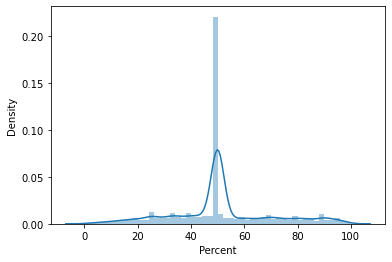

In [71]:
sns.distplot(df_copy['Percent'][(df_copy['Percent']>0)&(df_copy['Percent']<100)])

Berdasarkan perhitungan diatas bisa dilihat dari persentase distribusinya bahwa untuk kolom `Close Amount` yang memiliki `Status` *Settled* adalah 50% nya dari `Claim Amount`, maka untuk missing value pada kolom `Close Amount` yang berstatus *Settled* akan diisi nilainya 50% dari `Claim Amount`

In [72]:
# Mengisi missing value kolom 'Close Amount' yang memiliki status settled sama dengan 50% dari nilai pada kolom 'Claim Amount'
for i in range(0, len(df)):
    if ((df['Status'][i] == 'Settled') & (df['Close Amount'].isnull()[i])):
        df['Close Amount'][i] = 0.5 * df['Claim Amount'][i]

#### `Disposition`

Apabila diteliti lebih lanjut, bisa dilihat bahwa ternyata nilai pada kolom `Disposition` sama seperti nilai pada kolom `Status`, maka dari itu untuk penanganan pada kolom `Disposition` ini diperlukan untuk mengubah penamaan kategorik, kemudian missing value diisi dengan nilai yang sama pada kolom `Status`.

In [73]:
df['Disposition'].value_counts()

Deny               67209
Approve in Full    34442
Settle             27447
Name: Disposition, dtype: int64

In [74]:
# Mengubah penamaan data kategorik
df['Disposition'].replace('Approve in Full', 'Approved', inplace=True)
df['Disposition'].replace('Settle', 'Settled', inplace=True)
df['Disposition'].replace('Deny', 'Denied', inplace=True)

In [75]:
df['Disposition'].value_counts()

Denied      67209
Approved    34442
Settled     27447
Name: Disposition, dtype: int64

In [76]:
# Mengisi missing value berdasarkan nilai pada kolom 'Status'
df['Disposition'].fillna(df['Status'], inplace=True)

In [77]:
# Mengecek data duplikat
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Percent


In [78]:
df.drop(['Percent'], axis=1, inplace=True)

In [79]:
# Memeriksa apakah masih ada missing value
df.isna().sum()/df.shape[0]*100

Claim Number     0.0
Date Received    0.0
Incident Date    0.0
Airport Code     0.0
Airport Name     0.0
Airline Name     0.0
Claim Type       0.0
Claim Site       0.0
Item             0.0
Claim Amount     0.0
Status           0.0
Close Amount     0.0
Disposition      0.0
dtype: float64

In [80]:
list = []

for item in df:
    list.append([item, df[item].dtype, df[item].unique(), df[item].nunique()])

unique_table = pd.DataFrame(columns=['Column', 'Data Type', 'Unique', 'Nunique'], data=list)

print (df.shape)
display(unique_table)

(134889, 13)


,Column,Data Type,Unique,Nunique
0,Claim Number,object,"[12772, 2004102965797, 14460, 15242, 15324, 15...",134889
1,Date Received,datetime64[ns],"[2002-06-20T00:00:00.000000000, 2002-06-25T00:...",3472
2,Incident Date,datetime64[ns],"[2002-05-09T00:00:00.000000000, 2002-05-04T00:...",4721
3,Airport Code,object,"[BWI, ATL, Not Defined, SDF, RDU, PVD, CMH, BD...",434
4,Airport Name,object,"[Baltimore/Washington Intl Thurgood Marshall, ...",435
5,Airline Name,object,"[Southwest Airlines, Not Defined, American Air...",207
6,Claim Type,object,"[Other, Passenger Property Loss, Personal Inju...",9
7,Claim Site,object,"[Checkpoint, Other, Motor Vehicle, Checked Bag...",6
8,Item,object,"[Clothing , Jewelry , Eyeglasses , Luggage, Ph...",129
9,Claim Amount,float64,"[75.0, 4457.29, 16.71, 200.0, 50.0, 110000.0, ...",33159


Sebelum dataset dibersihkan, dataset memiliki 204.267 baris data, namun setelah dibersihkan tersisa 134.889 baris data. Sekitar 69.000 baris data dihapus, hal ini dapat terjadi dikarenakan banyak anomali pada dataset tsa_claims ini, namun tidak semua data yang mengalami anomali dihapus melainkan diubah juga menjadi data yang dirasa lebih relevan.

# **DATA ANALYSIS**

## Claim terbanyak terjadi di bandara dan maskapai penerbangan apa?

In [209]:
display(df.describe(), df.describe(include='object'))

,Claim Amount,Close Amount
count,1.348890e+05,134889.000000
mean,2.228847e+07,103.626698
std,8.168331e+09,904.021889
min,4.800000e-01,0.000000
25%,6.400000e+01,0.000000
50%,1.749900e+02,7.710000
75%,4.500000e+02,80.000000
max,3.000000e+12,250000.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,134889,134889,134889,134889,134889,134889,134889,134889,134889
unique,134889,434,435,207,9,6,129,3,3
top,12772,LAX,Los Angeles International Airport,Not Defined,Passenger Property Loss,Checked Baggage,Other,Denied,Denied
freq,1,6550,6550,27782,76333,108170,30577,67248,67248


Apabila dari hasil analisis deskriptif, dapat dilihat klaim terbanyak terjadi di *LAX (Los Angeles International Airport)* dan klaim terbanyak ditunjukan kepada maskapai yang namanya tidak didefinisikan pada data, sehingga hal ini kita tidak pastikan maskapai apa yang memiliki klaim terbanyak.

In [210]:
airport = df.groupby(['Airport Code'])['Claim Number'].count().sort_values(ascending=False)
airline = df.groupby(['Airline Name'])['Claim Number'].count().sort_values(ascending=False)


In [217]:
fig = go.Figure(data=[
                        go.Bar(name='Airport',x=airport.index,y=airport.values)
                    ])

fig.show()

In [219]:
fig = go.Figure(data=[
                        go.Bar(name='Airport',x=airline.index,y=airline.values)
                    ])

fig.show()

Berdasarkan visualisasi data:

- Airport yang paling banyak terjadi klaim adalah LAX (Los Angeles International Airport) dengan jumlah klaim sebanyak 6650.
- Maskapai yang paling banyak menerima klaim adalah 'Not Defined' atau nama airlines tidak diisi, namun data kedua tertinggi adalah American Airlines dengan jumlah klaim sebanyak 15698.

## Bagaimana perkembangan frekuensi klaim yang terjadi sejak tahun 2002 - 2015?

### Jumlah Claim per Tahun

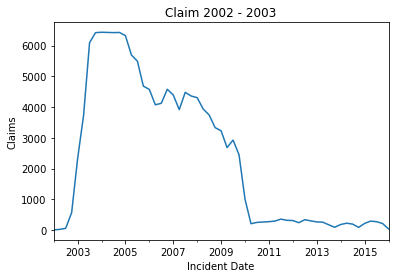

In [226]:
claims = df.copy()
claims = claims.groupby('Incident Date')['Claim Number'].count().resample('3M').sum()
claims = pd.DataFrame(claims)
claims.rename(columns={'Claim Number':'Claims'}, inplace=True)

fig = claims.plot()
plt.title('Claim 2002 - 2003')
plt.ylabel('Claims')
fig.legend_.remove()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa jumlah claim tertinggi terjadi di sekitar tahun 2003 - 2005, dan mulai menurun di tahun 2006 terus sampai 2015. Perlu dilakukan riset lebih mendetail untuk mengetahui faktor apa yang menyebabkan penurunan frekuensi claim dari tahun ke tahun terutama dari tahun 2008-2010. Namun kemungkinan besar hal ini terjadi karena ada perubahan dari peraturan keamanan bandara saat itu.

### Jumlah Klaim Setiap Minggu Dalam Waktu 1 Tahun

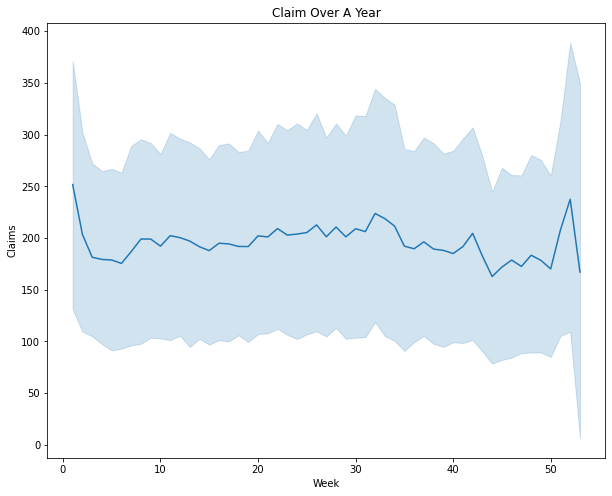

In [179]:
weeks = df[['Claim Number', 'Incident Date']].copy()
weeks['Year'] = weeks['Incident Date'].dt.year
weeks = weeks[(2003 <= weeks['Year']) & (weeks['Year'] <= 2017)]
weeks['Week'] = weeks['Incident Date'].dt.week
weeks = weeks.groupby(['Year', 'Week'])['Claim Number'].count()
weeks = pd.DataFrame(weeks)

weeks.reset_index(inplace = True)
weeks.rename(columns = {"Claim Number":"Claims"}, inplace = True)
weeks

plt.figure(figsize=(10, 8))
plt.title('Claim Over A Year')
sns.lineplot(data=weeks, x='Week', y='Claims');

Jumlah klaim tertinggi terjadi di sekitar minggu ke- 1, 50, 51, 52, hal ini dapat terjadi bersamaan dengan liburan hari natal dan tahun baru, dimana merupakan hal yang sering terjadi karena banyak orang memilih untuk pergi liburan sebelum hari natal dan kembali setelah tahun baru.

### Bagaimana hubungan klaim yang diterima terhadap lokasi dan jenis penyelesaiannya?

In [224]:
fig = px.treemap(df, path=['Claim Type','Claim Site','Disposition'],values='Close Amount',color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

- Tipe klaim 'Passanger Property Loss' lokasi klaim nya paling banyak terjadi di Checked Baggage, kemudian tipe penyelesaian yang paling banyak terjadi adalah settled atau penumpang yang mengalami kehilangan kebanyakan hanya menerima ganti rugi sebagian dari claim amount yang diajukan.
- Tipe klaim 'Property Damage' terjadu di Checkpoint dan Checked Baggage dengan jumlah yang hampir sama, dengan tipe penyelesaian yang terjadi adalah settled dan approve dengan jumlah yang mirip.

### Tipe Klaim yang Dibuat (Top 5)

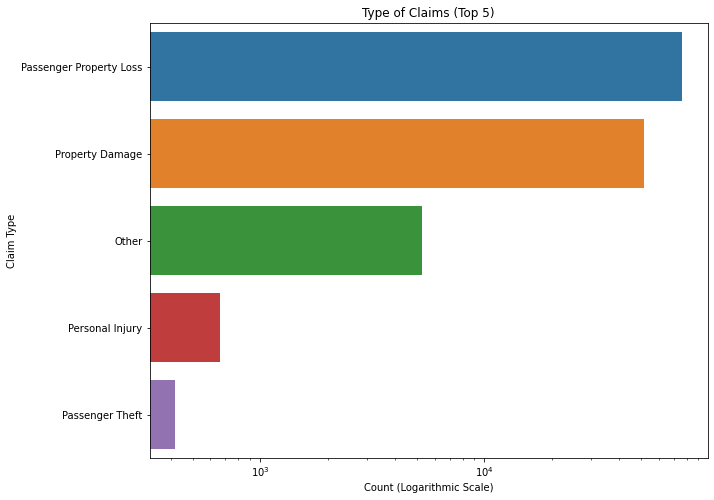

In [193]:
plt.figure(figsize=(10, 8))
plt.title('Type of Claims (Top 5)')
fig = sns.countplot(data =df, y='Claim Type', order=df['Claim Type'].value_counts().iloc[:5].index)
fig.set_xscale('log')
plt.xlabel('Count (Logarithmic Scale)')
plt.show()

### Lokasi Klaim yang Dibuat (Top 5)

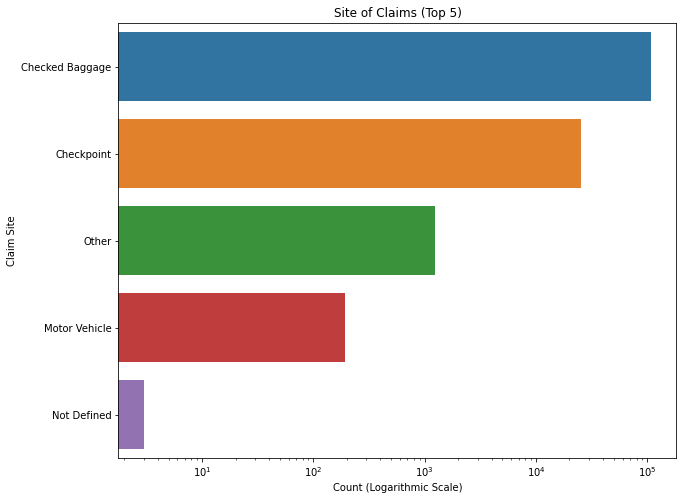

In [202]:
plt.figure(figsize=(10, 8))
plt.title('Site of Claims (Top 5)')
fig = sns.countplot(data =df, y='Claim Site', order=df['Claim Site'].value_counts().iloc[:5].index)
fig.set_xscale('log')
plt.xlabel('Count (Logarithmic Scale)')
plt.show()

### Kategori Item yang Hilang/Rusak (Top 10)

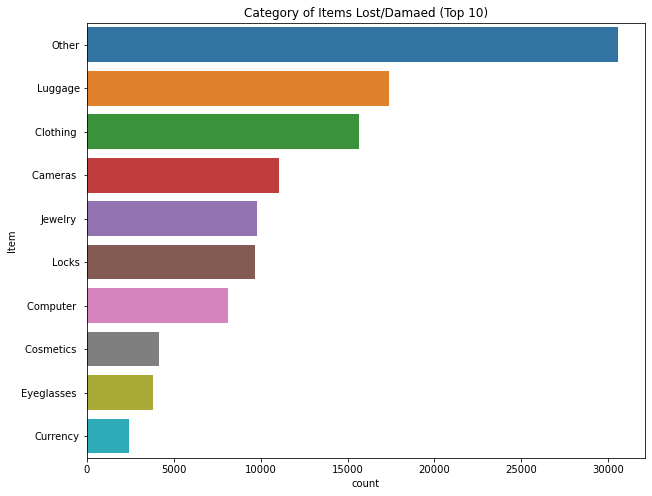

In [195]:
plt.figure(figsize=(10, 8))
plt.title('Category of Items Lost/Damaed (Top 10)')
fig = sns.countplot(data=df, y='Item', order=df['Item'].value_counts().iloc[:10].index);


### Status Klaim yang Dibuat

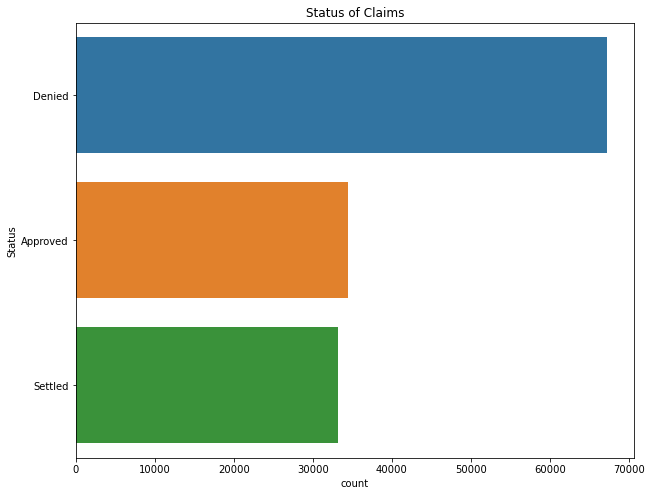

In [206]:
plt.figure(figsize=(10, 8))
plt.title('Status of Claims')
fig = sns.countplot(data =df, y='Status', order=df['Status'].value_counts().iloc[:5].index)
plt.show()

## Kesimpulan

- Tahun 2004 merupakan tahun yang paling banyak terjadinya klaim yaitu sebanyak 25707 klaim dibuat dari seluruh airport yang ada di USA
- Airport yang paling banyak menerima klaim adalah Los Angeles Internatinal Airport
- Airlines kedua terbanyak menerima klaim adalah Anerican Airlines, sedangkan yang terbanyak adalah Not defined value.
- Klaim terbanyak yang dibuat adalah terkait dengan kehilangan properti, dan lokasi pengajuan klaim dilakukan di pengecekan bagasi
- Penuruan klaim terjadi penurunan secara signifikan di tahun 2010

## Rekomendasi

1. Frekuensi terjadinya klaim dapat dikurangi dengan cara meningkatkan keamanan bagasi penumpang saat check-in dengan cara memperketat peraturan terhadap standard barang dan jenis barang yang dapat ditaruh di bagasi pesawat saat check-in.
2. Lokasi klaim lebih baik dikurangi dan difokuskan pada Checked Baggage dan Checkpoint saja, agar data klaim yang diajukan penumpang lebih terstruktur, dan hal ini juga bisa menyebabkan terjadi peningkatan terhadap kepuasan penumpang terhadap pelayanan proses klaim.
2. Untuk mengurangi kerugian maskapai/bandara dalam mengganti rugi bagasi yang hilang atau rusak juga bisa diatasi dengan penumpang diharuskan untuk memakai asuransi yang dapat dibeli saat membeli tiket tergantung berat bagasi yang dibawa oleh penumpang.